# **Import dependencies**

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy
from wordcloud import WordCloud
from nltk import FreqDist
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Text Mining Project/'
with open(path+'animelist_categorized.pkl', 'rb') as f:
    anime_df = pickle.load(f)

In [4]:
anime_df = anime_df[['Name', 'Genres','Synopsis']]

In [5]:
anime_df

,Name,Genres,Synopsis
0,Cowboy Bebop,"[Fantasy and Supernatural, Action and Adventure]","Crime is timeless. By the year 2071, humanity ..."
1,Cowboy Bebop: Tengoku no Tobira,"[Fantasy and Supernatural, Action and Adventure]","Another day, another bounty—such is the life o..."
2,Trigun,"[Fantasy and Supernatural, Action and Adventure]","Vash the Stampede is the man with a $$60,000,0..."
3,Witch Hunter Robin,"[Drama and Mistery, Action and Adventure, Fant...",Robin Sena is a powerful craft user drafted in...
4,Bouken Ou Beet,"[Fantasy and Supernatural, Action and Adventure]",It is the dark century and the people are suff...
...,...,...,...
9739,Mecha Mecha Karisuma,NaN,"This is the Charisma House. Today, too, the ch..."
9740,Follow Your Fantasy,NaN,Witness stunning animation featuring Cygames a...
9741,Pon no Michi,NaN,"Nashiko Jippensha, a high school girl living i..."
9742,A Flash | Honkai: Star Rail,NaN,"Year 7380 Star Calendar, Jingliu, the mara-str..."


# **Exploratory Data Analysis**

## **Count of all genres**

We count the unique genres within the dataframe.

In [6]:
anime_df_genresnotnull = anime_df[anime_df['Genres'].notnull()]

In [7]:
anime_df_genresnotnull

,Name,Genres,Synopsis
0,Cowboy Bebop,"[Fantasy and Supernatural, Action and Adventure]","Crime is timeless. By the year 2071, humanity ..."
1,Cowboy Bebop: Tengoku no Tobira,"[Fantasy and Supernatural, Action and Adventure]","Another day, another bounty—such is the life o..."
2,Trigun,"[Fantasy and Supernatural, Action and Adventure]","Vash the Stampede is the man with a $$60,000,0..."
3,Witch Hunter Robin,"[Drama and Mistery, Action and Adventure, Fant...",Robin Sena is a powerful craft user drafted in...
4,Bouken Ou Beet,"[Fantasy and Supernatural, Action and Adventure]",It is the dark century and the people are suff...
...,...,...,...
9256,The Demon Queen Has a Death Wish,"[Fantasy and Supernatural, Comedy and Romance]",I wanted to die.. until I met him.\nAfter brea...
9257,No More Princes,"[Fantasy and Supernatural, Comedy and Romance]",html.serialization_informationFIN.\nジャンル\nFant...
9258,The Forgotten Princess Just Wants Peace,"[Fantasy and Supernatural, Comedy and Romance]",I'm the daughter of a Duke?!\nWhile locked up ...
9259,Beauty and the Brawn,"[Love, Comedy and Romance]",Haeun is a nobleman who falls hard for Dullseh...


In [8]:
genres = []

for i in anime_df_genresnotnull['Genres']:
  for j in i:
    if j not in genres:
      genres.append(j)

In [9]:
print(f"In the dataset there are {len(genres)} different genres.")

In the dataset there are 9 different genres.


## **Genres plot**

We count how many times each genre appears.

In [10]:
genres_count = {}

for i in anime_df_genresnotnull['Genres']:
  for j in i:
    if j not in genres_count.keys():
      genres_count[j] = 1
    else:
      genres_count[j] += 1

In [11]:
genres_df = pd.DataFrame({'Genre': list(genres_count.keys()),
                              'Count': list(genres_count.values())})

In [12]:
genres_df

,Genre,Count
0,Fantasy and Supernatural,4731
1,Action and Adventure,4048
2,Drama and Mistery,2258
3,Sport and Slice of Life,1110
4,Comedy and Romance,3888
5,Horror and Suspense,483
6,Erotica e Hentai,1354
7,Gourmet and Avant Garde,227
8,Love,202


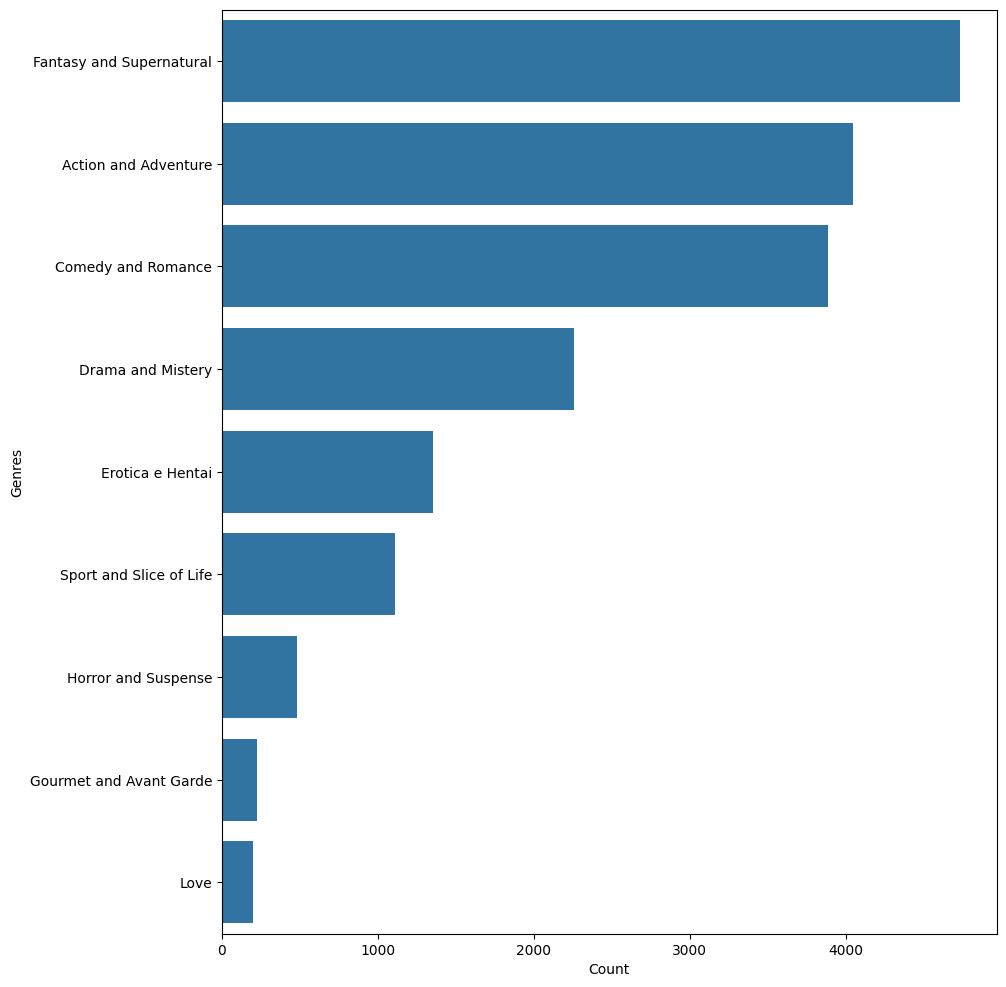

In [14]:
g = genres_df.nlargest(columns="Count", n=9)
plt.figure(figsize=(10,12))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Genres')
plt.show()

## **Wordclouds of the first 6 most common genres**

We print wordclouds to try to see if there are words that appear most often within the most common genres.

#### **Text Cleaning**

We clean and process the synopsis in order to create wordclouds.

In [15]:
anime_df_genresnotnull['Synopsis'][2]

'Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he\'s a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title "The Humanoid Typhoon." He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs.\n\nWith his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly Thompson, who attempt to minimize his impact on the public. But soon, their misadventures evolve into life-or-death situations as a group of legendary assassins are summoned to bring about suffering to the trio. Vash\'s agonizing past will be unraveled and his morality and principles pushed to the brea

In [16]:
newlines = 0
tabs = 0
two_tabs = 0
tab_newline = 0
whitespaces = 0
for text in anime_df_genresnotnull['Synopsis']:
  newlines += text.count('\n\n')
  tabs += text.count('\t')
  two_tabs += text.count('\t\t')
  tab_newline += text.count('\n\t')
  whitespaces += text.count('  ')
print("Number of 2 newlines", newlines)
print("Number of tabs", tabs)
print("Number of 2 tabs", two_tabs)
print("Number of tab and newline", tab_newline)
print("Number whitespaces", whitespaces)

Number of 2 newlines 11471
Number of tabs 0
Number of 2 tabs 0
Number of tab and newline 0
Number whitespaces 417


In [17]:
def clean_text(text):
  text = text.replace('\n',' ') #remove newlines
  text = text.lower() #lowercase
  text = re.sub(r"\([Ss]ource: [A-Za-z0-9]*\)", "", text) #remove the source of the synopsis
  text = re.sub(r"[^a-z\s]+"," ",text) #remove puntuaction and symbols
  text = " ".join(re.split("\s+", text, flags=re.UNICODE)) #remove multiple whitespaces
  text = re.sub(r'\b\w\b', ' ', text) #remove single letters
  return text

In [18]:
anime_df_genresnotnull['cleaned_synopsis'] = anime_df_genresnotnull['Synopsis'].apply(lambda x: clean_text(x))

<ipython-input-18-19fd7cd16642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df_genresnotnull['cleaned_synopsis'] = anime_df_genresnotnull['Synopsis'].apply(lambda x: clean_text(x))


In [ ]:
newlines = 0
tabs = 0
two_tabs = 0
tab_newline = 0
whitespaces = 0
for text in anime_df_genresnotnull['cleaned_synopsis']:
  newlines += text.count('\n\n')
  tabs += text.count('\t')
  two_tabs += text.count('\t\t')
  tab_newline += text.count('\n\t')
  whitespaces += text.count('  ')
print("Number of 2 newlines", newlines)
print("Number of tabs", tabs)
print("Number of 2 tabs", two_tabs)
print("Number of tab and newline", tab_newline)
print("Number whitespaces", whitespaces)

In [20]:
anime_df_genresnotnull['cleaned_synopsis'] = anime_df_genresnotnull['cleaned_synopsis'].apply(lambda x: clean_text(x))

<ipython-input-20-c81e185e3532>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df_genresnotnull['cleaned_synopsis'] = anime_df_genresnotnull['cleaned_synopsis'].apply(lambda x: clean_text(x))


In [22]:
anime_df_genresnotnull['Synopsis'][2]

'Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he\'s a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title "The Humanoid Typhoon." He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs.\n\nWith his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly Thompson, who attempt to minimize his impact on the public. But soon, their misadventures evolve into life-or-death situations as a group of legendary assassins are summoned to bring about suffering to the trio. Vash\'s agonizing past will be unraveled and his morality and principles pushed to the brea

In [23]:
anime_df_genresnotnull['cleaned_synopsis'][2]

'vash the stampede is the man with bounty on his head the reason he merciless villain who lays waste to all those that oppose him and flattens entire cities for fun garnering him the title the humanoid typhoon he leaves trail of death and destruction wherever he goes and anyone can count themselves dead if they so much as make eye contact or so the rumors say in actuality vash is huge softie who claims to have never taken life and avoids violence at all costs with his crazy doughnut obsession and buffoonish attitude in tow vash traverses the wasteland of the planet gunsmoke all the while followed by two insurance agents meryl stryfe and milly thompson who attempt to minimize his impact on the public but soon their misadventures evolve into life or death situations as group of legendary assassins are summoned to bring about suffering to the trio vash agonizing past will be unraveled and his morality and principles pushed to the breaking point '

#### **Tokenization, Lemmatization and Stopwords Remotion**

In [24]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # load the model
stop_words = set(nlp.Defaults.stop_words) # defining the stopwords
stop_words.add('new')
stop_words.add('find')
stop_words.add('world')

In [25]:
def preprocess_text(text):
  #lemmatize
  doc = nlp(text)
  text = " ".join([token.lemma_ for token in doc])
  text = text.split(' ')
  #remove stopwords
  lst=[]
  for token in text:
    if token not in stop_words:
        lst.append(token)
  text = [word for word in lst]
  return text

In [26]:
anime_df_genresnotnull['preprocessed_synopsis'] = anime_df_genresnotnull['cleaned_synopsis'].apply(lambda x: preprocess_text(x))

<ipython-input-26-c99b76813827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df_genresnotnull['preprocessed_synopsis'] = anime_df_genresnotnull['cleaned_synopsis'].apply(lambda x: preprocess_text(x))


In [27]:
anime_df_genresnotnull['preprocessed_synopsis'][2]

['vash',
 'stampede',
 'man',
 'bounty',
 'head',
 'reason',
 'merciless',
 'villain',
 'lay',
 'waste',
 'oppose',
 'flatten',
 'entire',
 'city',
 'fun',
 'garner',
 'title',
 'humanoid',
 'typhoon',
 'leave',
 'trail',
 'death',
 'destruction',
 'count',
 'dead',
 'eye',
 'contact',
 'rumor',
 'actuality',
 'vash',
 'huge',
 'softie',
 'claim',
 'life',
 'avoid',
 'violence',
 'cost',
 'crazy',
 'doughnut',
 'obsession',
 'buffoonish',
 'attitude',
 'tow',
 'vash',
 'traverse',
 'wasteland',
 'planet',
 'gunsmoke',
 'follow',
 'insurance',
 'agent',
 'meryl',
 'stryfe',
 'milly',
 'thompson',
 'attempt',
 'minimize',
 'impact',
 'public',
 'soon',
 'misadventure',
 'evolve',
 'life',
 'death',
 'situation',
 'group',
 'legendary',
 'assassin',
 'summon',
 'bring',
 'suffer',
 'trio',
 'vash',
 'agonizing',
 'past',
 'unravel',
 'morality',
 'principle',
 'push',
 'breaking',
 'point']

In [28]:
anime_df_genresnotnull

,Name,Genres,Synopsis,cleaned_synopsis,preprocessed_synopsis
0,Cowboy Bebop,"[Fantasy and Supernatural, Action and Adventure]","Crime is timeless. By the year 2071, humanity ...",crime is timeless by the year humanity has exp...,"[crime, timeless, year, humanity, expand, gala..."
1,Cowboy Bebop: Tengoku no Tobira,"[Fantasy and Supernatural, Action and Adventure]","Another day, another bounty—such is the life o...",another day another bounty such is the life of...,"[day, bounty, life, unlucky, crew, bebop, rout..."
2,Trigun,"[Fantasy and Supernatural, Action and Adventure]","Vash the Stampede is the man with a $$60,000,0...",vash the stampede is the man with bounty on hi...,"[vash, stampede, man, bounty, head, reason, me..."
3,Witch Hunter Robin,"[Drama and Mistery, Action and Adventure, Fant...",Robin Sena is a powerful craft user drafted in...,robin sena is powerful craft user drafted into...,"[robin, sena, powerful, craft, user, draft, st..."
4,Bouken Ou Beet,"[Fantasy and Supernatural, Action and Adventure]",It is the dark century and the people are suff...,it is the dark century and the people are suff...,"[dark, century, people, suffer, rule, devil, v..."
...,...,...,...,...,...
9256,The Demon Queen Has a Death Wish,"[Fantasy and Supernatural, Comedy and Romance]",I wanted to die.. until I met him.\nAfter brea...,wanted to die until met him after breaking tr...,"[, , want, die, meet, break, treaty, wage, war..."
9257,No More Princes,"[Fantasy and Supernatural, Comedy and Romance]",html.serialization_informationFIN.\nジャンル\nFant...,html serialization informationfin fant romance...,"[html, serialization, informationfin, fant, ro..."
9258,The Forgotten Princess Just Wants Peace,"[Fantasy and Supernatural, Comedy and Romance]",I'm the daughter of a Duke?!\nWhile locked up ...,the daughter of duke while locked up in priso...,"[, , daughter, duke, lock, prison, cell, eluan..."
9259,Beauty and the Brawn,"[Love, Comedy and Romance]",Haeun is a nobleman who falls hard for Dullseh...,haeun is nobleman who falls hard for dullseh h...,"[haeun, nobleman, fall, hard, dullseh, gorgeou..."


#### **Creating Wordclouds**

In [37]:
def create_wordclouds(genre):
  words = []
  for i in range(len(anime_df_genresnotnull['Genres'])):
    if genre in anime_df_genresnotnull['Genres'][i]:
      words += anime_df_genresnotnull['preprocessed_synopsis'][i]
  fdist= FreqDist(words) # Considering the frequencies of the words
  wc= WordCloud(width=800, height=400, max_words=50, min_font_size = 10, prefer_horizontal = 1, background_color = 'black').generate_from_frequencies(fdist) # Generate the wordcloud from the frequencies
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation="bilinear")
  plt.title(genre)
  return plt.show()

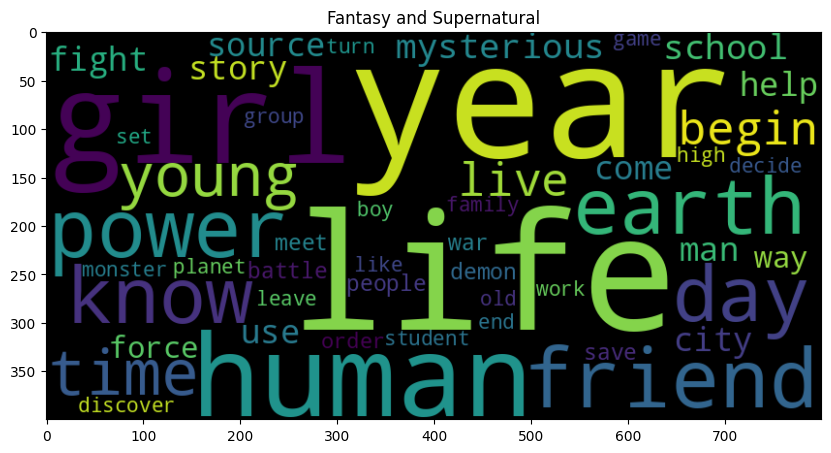

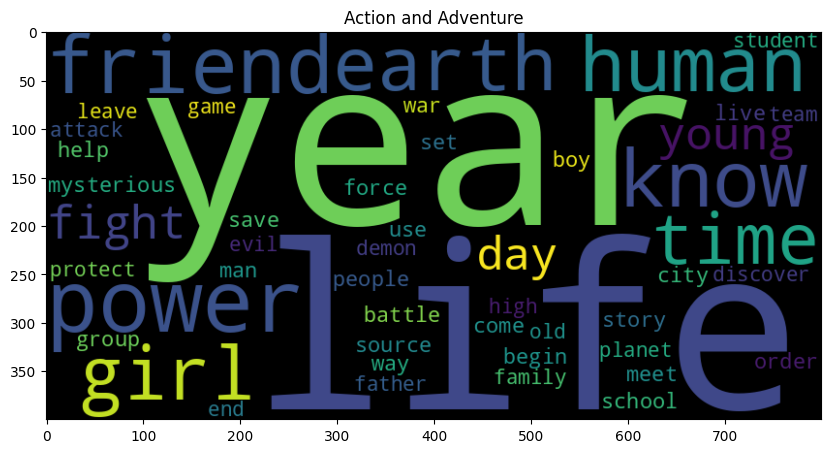

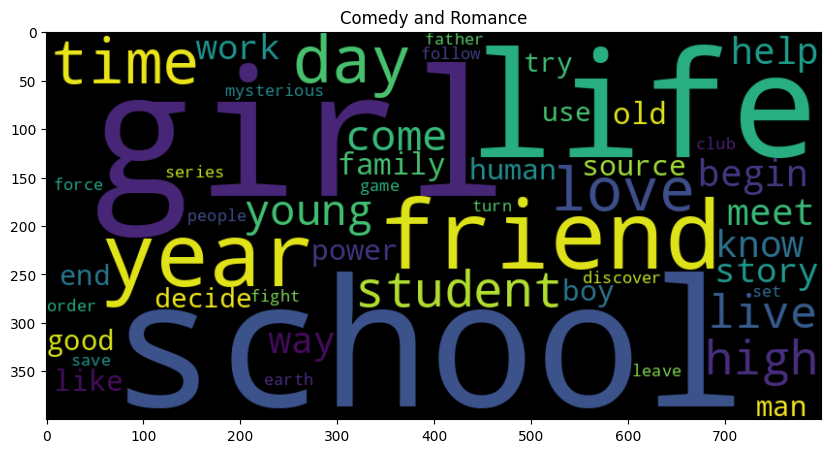

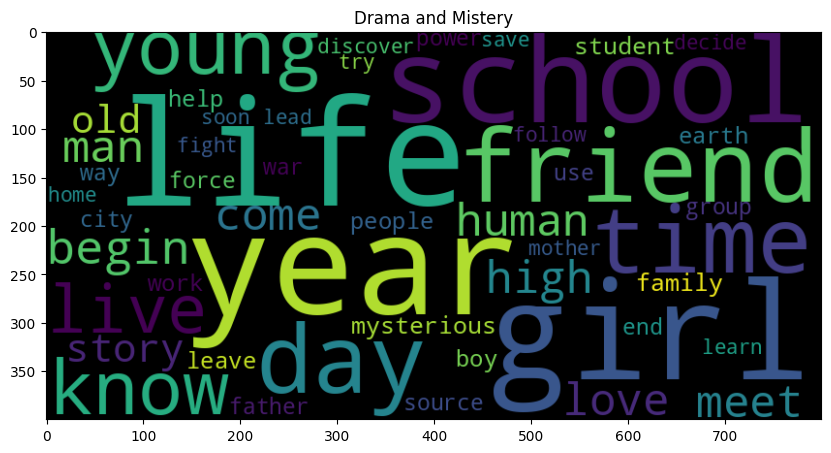

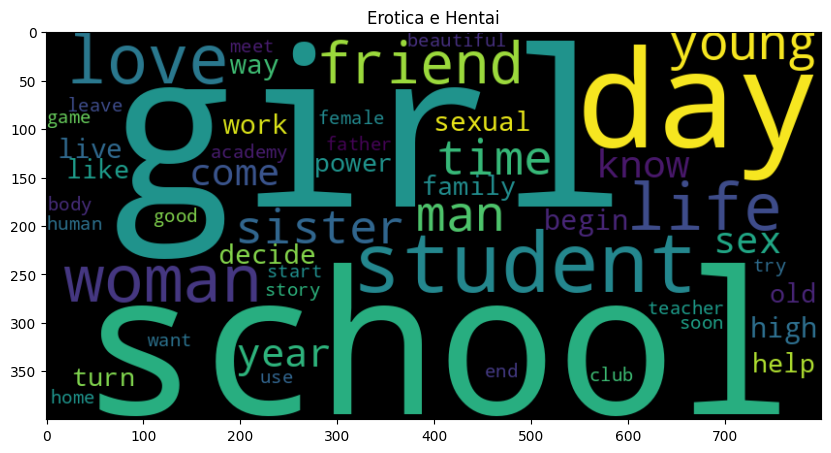

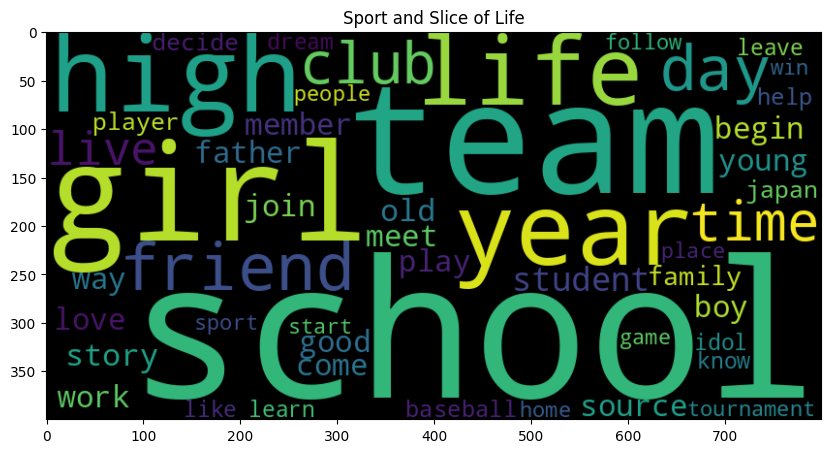

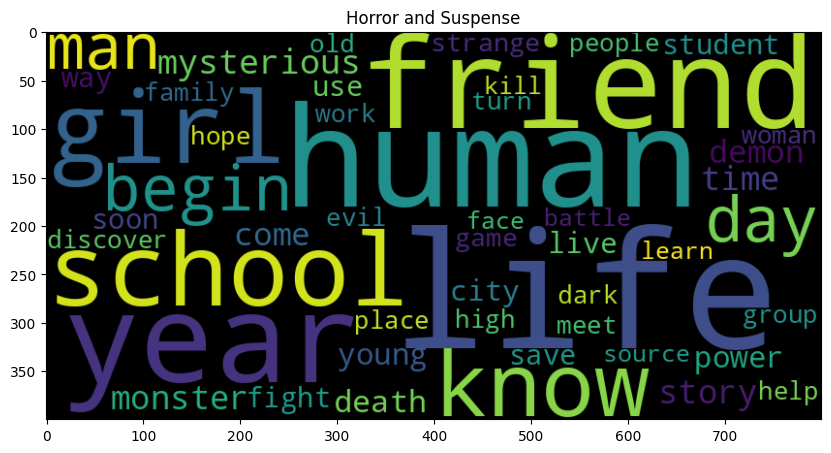

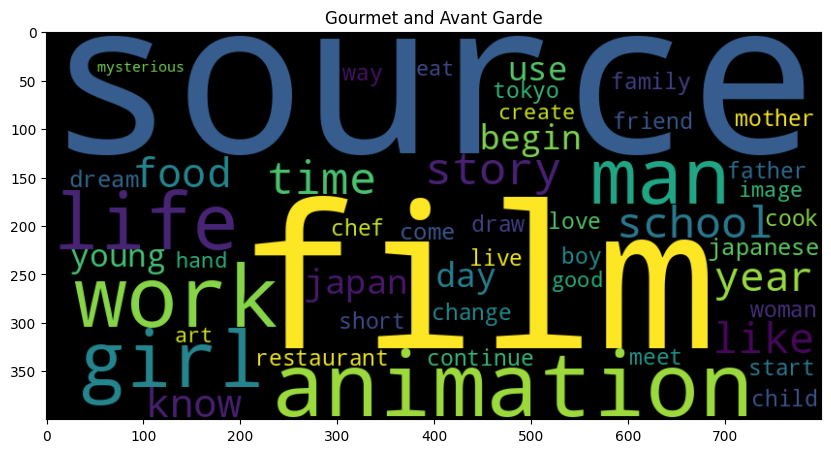

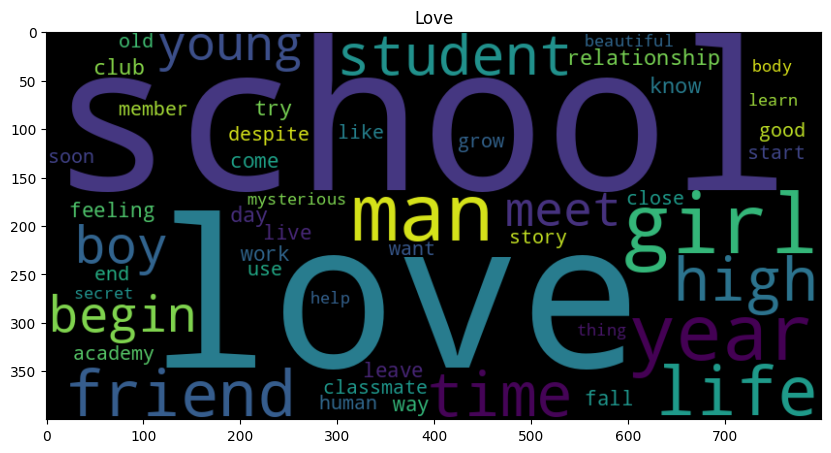

In [38]:
for genre in g['Genre'][0:9]:
  create_wordclouds(genre)

We notice that words such as *year* and *life* are very common in all six of the genres. We are going to take this into account in the subsequent analysis by adding those words to the set of stopwords.